In [12]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import splitfolders

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
path = "/content/drive/MyDrive/yoga_pose"
#path = "/content/drive/SharedDrives/yoga_pose"


dataset = "yoga_pose"
path = "/content/drive/MyDrive/"+dataset
train_path = path + '/Train'
test_path = path + '/Test'
output = path + '/output'


In [16]:
#Run only once to create the output folder
#splitfolders.ratio(train_path, output=output, seed=42, ratio=(.8, 0.2) )

shape of the image is: (268, 527, 4)


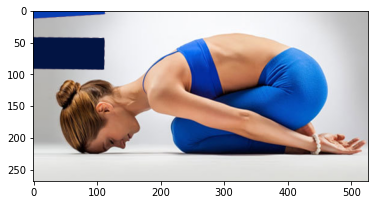

In [17]:
# Visualise the original data
yoga_image = train_path + '/Balasana/' +  'File7.png'
print("shape of the image is:",imread(yoga_image).shape)
plt.imshow(imread(yoga_image))


In [18]:
#split data to train and validate

#splitfolders.ratio(train_path, output="output", seed=42, ratio=(.8, 0.2) )

In [19]:
train_data = ImageDataGenerator(width_shift_range = 0.1,horizontal_flip = True,rescale = 1./255)
val_data = ImageDataGenerator(width_shift_range = 0.1,horizontal_flip = True,rescale = 1./255)
test_data = ImageDataGenerator(rescale =1./255,validation_split = 0.2)

In [20]:
splitted_dir =output
train_path = splitted_dir + '/train'
val_path = splitted_dir + '/val'

In [21]:
batch_size = 16

In [22]:
train_tot = train_data.flow_from_directory(directory = train_path,
                                                   target_size = (224,224),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size,
                                                   subset = 'training')
validation_tot = test_data.flow_from_directory(directory = val_path,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')
test_tot = test_data.flow_from_directory(directory = test_path,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')

Found 1172 images belonging to 29 classes.
Found 58 images belonging to 29 classes.
Found 137 images belonging to 29 classes.


In [30]:
train_tot_448 = train_data.flow_from_directory(directory = train_path,
                                                   target_size = (448,448),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                   batch_size = batch_size,
                                                   subset = 'training')
validation_tot_448 = test_data.flow_from_directory(directory = val_path,
                                                       target_size = (448,448),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')
test_tot_448 = test_data.flow_from_directory(directory = test_path,
                                                       target_size = (448,448),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                      batch_size = batch_size,
                                                       subset = 'validation')

Found 1172 images belonging to 29 classes.
Found 58 images belonging to 29 classes.
Found 137 images belonging to 29 classes.


## ResNet50

In [58]:
batch = 4
early_stopping = EarlyStopping(min_delta=0.005, patience=8, restore_best_weights=True)

In [46]:
x_1 = keras.applications.ResNet50(include_top=True, weights="imagenet",input_shape= (224,224,3))
x = x_1.layers[-2].output
predictions = Dense(29, activation='softmax')(x)
model_rs50_0 = tf.keras.Model(inputs=x_1.input, outputs=predictions)
for layer in model_rs50_0.layers:
  layer.trainable = False
model_rs50_0.layers[-1].trainable = True
#print(model_rs50_0.summary())
model_rs50_0.compile(optimizer=tf.keras.optimizers.SGD(1e-3, momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
history_0 = model_rs50_0.fit(train_tot, validation_data = validation_tot, epochs = 50,callbacks = [early_stopping])

Epoch 1/50
74/74 [==============================] - 22s 297ms/step - loss: 3.4861 - accuracy: 0.0358 - val_loss: 3.4625 - val_accuracy: 0.0517
Epoch 2/50
74/74 [==============================] - 21s 289ms/step - loss: 3.4649 - accuracy: 0.0367 - val_loss: 3.4050 - val_accuracy: 0.0690
Epoch 3/50
74/74 [==============================] - 21s 280ms/step - loss: 3.4357 - accuracy: 0.0486 - val_loss: 3.3402 - val_accuracy: 0.0690
Epoch 4/50
74/74 [==============================] - 21s 278ms/step - loss: 3.3977 - accuracy: 0.0597 - val_loss: 3.3888 - val_accuracy: 0.0345
Epoch 5/50
74/74 [==============================] - 21s 289ms/step - loss: 3.3943 - accuracy: 0.0495 - val_loss: 3.3343 - val_accuracy: 0.0517
Epoch 6/50
74/74 [==============================] - 21s 279ms/step - loss: 3.4010 - accuracy: 0.0580 - val_loss: 3.3433 - val_accuracy: 0.0345
Epoch 7/50
74/74 [==============================] - 21s 282ms/step - loss: 3.3325 - accuracy: 0.0794 - val_loss: 3.3035 - val_accuracy: 0.0690

In [50]:
results_0 = model_rs50_0.evaluate(test_tot, batch_size=10)
print("Results_0 test loss, test acc:", results_0)

9/9 [==============================] - 1s 110ms/step - loss: 2.9513 - accuracy: 0.2044
Results_0 test loss, test acc: [2.9513468742370605, 0.20437955856323242]


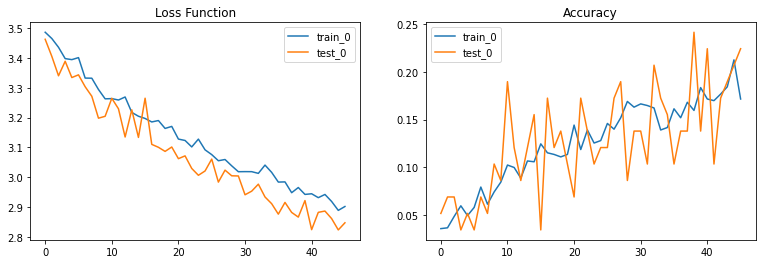

In [51]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_0.history['loss'], label='train_0')
plt.plot(history_0.history['val_loss'], label='test_0')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_0.history['accuracy'], label='train_0')
plt.plot(history_0.history['val_accuracy'], label='test_0')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
x_1 = keras.applications.ResNet50(include_top=False, weights="imagenet",input_shape= (224,224,3))
x = x_1.layers[-1].output
x = tf.keras.layers.AveragePooling2D(pool_size=(7, 7))(x)
x = Flatten()(x)
predictions = Dense(29, activation='softmax')(x)
model_rs50_1 = tf.keras.Model(inputs=x_1.input, outputs=predictions)

for layer in model_rs50_1.layers:
  layer.trainable = False
model_rs50_1.layers[-1].trainable = True
model_rs50_1.layers[-3].trainable = True
model_rs50_1.layers[-6].trainable = True
model_rs50_1.layers[-7].trainable = True

#print(model_rs50_1.summary())
# for layer in model_rs50_1.layers:
#   print(layer,layer.trainable)
model_rs50_1.compile(optimizer=tf.keras.optimizers.SGD(1e-3, momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

In [43]:
history_1 = model_rs50_1.fit(train_tot, validation_data = validation_tot, epochs = 50,callbacks = [early_stopping])

Epoch 1/30
27/74 [=========>....................] - ETA: 14s - loss: 3.4479 - accuracy: 0.0417

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


74/74 [==============================] - 26s 318ms/step - loss: 3.3650 - accuracy: 0.0623 - val_loss: 3.3849 - val_accuracy: 0.0517
Epoch 2/30
74/74 [==============================] - 23s 309ms/step - loss: 3.1322 - accuracy: 0.1271 - val_loss: 3.2689 - val_accuracy: 0.0345
Epoch 3/30
74/74 [==============================] - 23s 303ms/step - loss: 2.9673 - accuracy: 0.1758 - val_loss: 3.0846 - val_accuracy: 0.0862
Epoch 4/30
74/74 [==============================] - 22s 291ms/step - loss: 2.8528 - accuracy: 0.1962 - val_loss: 2.9056 - val_accuracy: 0.2241
Epoch 5/30
74/74 [==============================] - 22s 291ms/step - loss: 2.7297 - accuracy: 0.2517 - val_loss: 2.7500 - val_accuracy: 0.2241
Epoch 6/30
74/74 [==============================] - 24s 323ms/step - loss: 2.6081 - accuracy: 0.3097 - val_loss: 2.5811 - val_accuracy: 0.3276
Epoch 7/30
74/74 [==============================] - 23s 304ms/step - loss: 2.5663 - accuracy: 0.2961 - val_loss: 2.4896 - val_accuracy: 0.2069
Epoch 8/30

In [44]:
results_1 = model_rs50_1.evaluate(test_tot, batch_size=10)
print("Results_1 test loss, test acc:", results_1)

9/9 [==============================] - 1s 116ms/step - loss: 2.2488 - accuracy: 0.3358
Results_1 test loss, test acc: [2.2488222122192383, 0.33576643466949463]


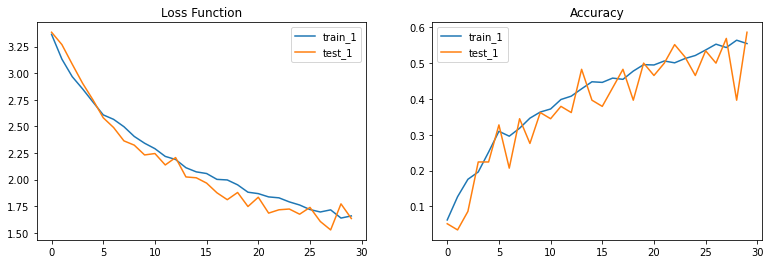

In [52]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_1.history['loss'], label='train_1')
plt.plot(history_1.history['val_loss'], label='test_1')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_1.history['accuracy'], label='train_1')
plt.plot(history_1.history['val_accuracy'], label='test_1')
plt.title('Accuracy')
plt.legend()
plt.show()

In [ ]:
x_1 = keras.applications.ResNet50(include_top=False, weights="imagenet",input_shape= (224,224,3))
x = x_1.layers[-1].output
x = tf.keras.layers.AveragePooling2D(pool_size=(7, 7))(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(29, activation="softmax")(x)
model_rs50_2 = tf.keras.Model(inputs=x_1.input, outputs=predictions)

for layer in model_rs50_2.layers:
  layer.trainable = False
model_rs50_2.layers[-1].trainable = True
model_rs50_2.layers[-3].trainable = True
model_rs50_2.layers[-5].trainable = True
model_rs50_2.layers[-9].trainable = True
model_rs50_2.layers[-10].trainable = True
#print(model_rs50_2.summary())
for layer in model_rs50_2.layers:
  print(layer,layer.trainable)
model_rs50_2.compile(optimizer=tf.keras.optimizers.SGD(1e-3, momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
history_2 = model_rs50_2.fit(train_tot, validation_data = validation_tot, epochs = 50,callbacks = [early_stopping])

Epoch 1/50
74/74 [==============================] - 23s 309ms/step - loss: 3.4659 - accuracy: 0.0324 - val_loss: 3.3556 - val_accuracy: 0.0345
Epoch 2/50
74/74 [==============================] - 22s 299ms/step - loss: 3.3690 - accuracy: 0.0333 - val_loss: 3.3381 - val_accuracy: 0.0345
Epoch 3/50
74/74 [==============================] - 21s 282ms/step - loss: 3.3437 - accuracy: 0.0538 - val_loss: 3.2759 - val_accuracy: 0.0862
Epoch 4/50
74/74 [==============================] - 21s 282ms/step - loss: 3.3046 - accuracy: 0.0614 - val_loss: 3.1746 - val_accuracy: 0.0862
Epoch 5/50
74/74 [==============================] - 21s 282ms/step - loss: 3.2748 - accuracy: 0.0683 - val_loss: 3.1726 - val_accuracy: 0.0690
Epoch 6/50
74/74 [==============================] - 21s 283ms/step - loss: 3.2438 - accuracy: 0.0725 - val_loss: 3.1519 - val_accuracy: 0.1034
Epoch 7/50
74/74 [==============================] - 21s 280ms/step - loss: 3.2067 - accuracy: 0.0811 - val_loss: 3.0827 - val_accuracy: 0.0517

In [36]:
results_2 = model_rs50_2.evaluate(test_tot, batch_size=10)
print("Results_2 test loss, test acc:", results_2)

9/9 [==============================] - 64s 8s/step - loss: 2.8457 - accuracy: 0.1606
Results_2 test loss, test acc: [2.8456692695617676, 0.16058394312858582]


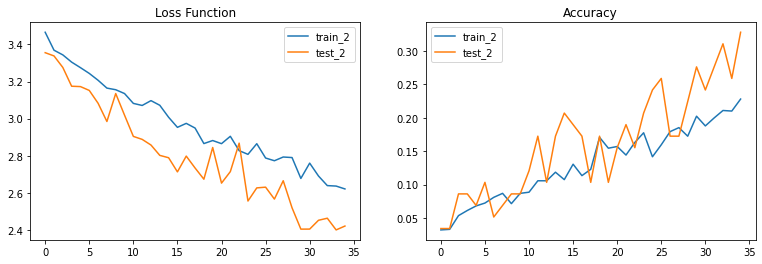

In [53]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_2.history['loss'], label='train_2')
plt.plot(history_2.history['val_loss'], label='test_2')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_2.history['accuracy'], label='train_2')
plt.plot(history_2.history['val_accuracy'], label='test_2')

plt.title('Accuracy')
plt.legend()
plt.show()

In [55]:
x_1 = keras.applications.ResNet50(include_top=False, weights="imagenet",input_shape= (448,448,3))
x = x_1.layers[-1].output
# x = Flatten()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.5)(x)
# predictions = Dense(29, activation='softmax')(x)
x = tf.keras.layers.AveragePooling2D(pool_size=(14, 14))(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(29, activation="softmax")(x)
model_rs50_3 = tf.keras.Model(inputs=x_1.input, outputs=predictions)

for layer in model_rs50_3.layers:
  layer.trainable = False
model_rs50_3.layers[-1].trainable = True
model_rs50_3.layers[-3].trainable = True
model_rs50_3.layers[-5].trainable = True
model_rs50_3.layers[-9].trainable = True
model_rs50_3.layers[-10].trainable = True
#print(model_rs50_3.summary())
model_rs50_3.compile(optimizer=tf.keras.optimizers.SGD(1e-3, momentum=0.9),loss='categorical_crossentropy',metrics=['accuracy'])

In [59]:
history_3 = model_rs50_3.fit(train_tot_448, validation_data = validation_tot_448, epochs = 50,callbacks = [early_stopping])

Epoch 1/50
74/74 [==============================] - 57s 772ms/step - loss: 3.4087 - accuracy: 0.0367 - val_loss: 3.3579 - val_accuracy: 0.0172
Epoch 2/50
74/74 [==============================] - 55s 743ms/step - loss: 3.3752 - accuracy: 0.0461 - val_loss: 3.3460 - val_accuracy: 0.0345
Epoch 3/50
74/74 [==============================] - 56s 749ms/step - loss: 3.3613 - accuracy: 0.0538 - val_loss: 3.3372 - val_accuracy: 0.0690
Epoch 4/50
74/74 [==============================] - 55s 739ms/step - loss: 3.3653 - accuracy: 0.0461 - val_loss: 3.3241 - val_accuracy: 0.1034
Epoch 5/50
74/74 [==============================] - 56s 756ms/step - loss: 3.3382 - accuracy: 0.0469 - val_loss: 3.3184 - val_accuracy: 0.0517
Epoch 6/50
74/74 [==============================] - 54s 731ms/step - loss: 3.3373 - accuracy: 0.0529 - val_loss: 3.2869 - val_accuracy: 0.0862
Epoch 7/50
74/74 [==============================] - 54s 726ms/step - loss: 3.3095 - accuracy: 0.0589 - val_loss: 3.2713 - val_accuracy: 0.0690

In [60]:
results_3 = model_rs50_3.evaluate(test_tot_448, batch_size=10)
print("Results_3 test loss, test acc:", results_3)

9/9 [==============================] - 2s 206ms/step - loss: 2.8328 - accuracy: 0.1095
Results_3 test loss, test acc: [2.8327553272247314, 0.10948905348777771]


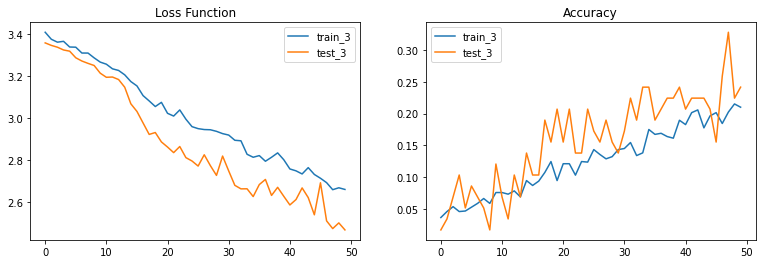

In [61]:
plt.figure(figsize=(13, 4))

#loss function
plt.subplot(1,2,1)
plt.plot(history_3.history['loss'], label='train_3')
plt.plot(history_3.history['val_loss'], label='test_3')
plt.title('Loss Function')
plt.legend()

#accuracy
plt.subplot(1,2,2)
plt.plot(history_3.history['accuracy'], label='train_3')
plt.plot(history_3.history['val_accuracy'], label='test_3')
plt.title('Accuracy')
plt.legend()
plt.show()